# Testing functions in JAX for Fokker-Planck 2D
***
Created by: Juan Felipe Osorio Ramirez

Department of Applied Mathematics, UW
***

> $\partial_t \rho=\nabla \cdot\left(\mathcal{M} \nabla \frac{\rho}{\mathcal{M}}\right)$, for  $t > 0$, $(x,y) \in \Omega=(-3,3) \times(-3,3)$.

> $u(0, x)=u^0(x), \quad x \in \Omega=(-3,3) \times(-3,3)$

> $\left.\nabla \frac{\rho}{\mathcal{M}} \cdot \mathbf{n}\right|_{\partial \Omega}=0, \quad t \geq 0 .$


where $\mathcal{M}:=e^{-\frac{x^2+y^2}{2}}$

## Libraries

In [1]:
# Import packages
import sys
sys.path.append('/home/juanfelipe/Desktop/research/kinetick/source')
import jax.numpy as np
from jax import grad, jit
from jax.scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt 
#from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from parameter_learning import *
from plotlib import *
from models import * 
from interpolation import *
from kernels import *
from integrate import trap
from sklearn.metrics import mean_squared_error

import jax.numpy as jnp
from jax import grad, jit
from jax.config import config; 
from numpy.linalg import norm
config.update("jax_enable_x64", True)

from functools import partial # for jit to make codes faster

## Test of `JAX` functionality

In [2]:
T = jnp.array([[2.,2.5],[4.,6.]])
T_ = jnp.array([[4.,5.5],[4.5,6.5],[8.5,9.5]])
kernel = Gaussian2D
params = 1

$\partial_{x}\left(\frac{K(x,y)}{M(x)}\right)|_{x=x_m,y=x_{m'}}$

In [3]:
partial_KoverMx_2D(T,T_,kernel,params)

(Array([[1.01135838e+00, 1.11543848e-02, 2.19024354e-17],
        [6.90923096e+11, 6.85954679e+11, 1.45810945e+05]], dtype=float64),
 Array([[1.39061778e+00, 1.61118891e-02, 2.44791925e-17],
        [9.50019257e+11, 9.90823425e+11, 1.62965174e+05]], dtype=float64))

In [4]:
t1 = 2.
t2 = 2.5
t1_ = 2.
t2_ = 8.5
kernel = Gaussian2D
params = 1

In [5]:
partial_KoverMx2D(t1,t2,t1_,t2_,kernel,params)

(Array(5.12257754e-06, dtype=float64, weak_type=True),
 Array(2.17709546e-05, dtype=float64, weak_type=True))

In [6]:
top_partial_KoverMx2D(t1,t2,t1_,t2_,kernel,params)

Array(4.35419091e-05, dtype=float64)

$M(x)\partial_{x}\left(\frac{K(x,y)}{M(x)}\right)|_{x=x_m,y=x_{m'}}$

In [7]:
MtimesPartialx_2D(T,T_,kernel,params) 

Array([[[6.01375677e-03, 8.26891556e-03],
        [6.63263965e-05, 9.58047949e-05],
        [1.30236642e-19, 1.45558600e-19]],

       [[3.52998761e+00, 4.85373296e+00],
        [3.50460352e+00, 5.06220509e+00],
        [7.44961099e-07, 8.32603581e-07]]], dtype=float64)

In [8]:
MtimesPartialx2D(t1,t2,t1_,t2_,kernel,params)

Array([3.04599595e-08, 1.29454828e-07], dtype=float64)

$\partial_x\left(M(x)\partial_{x}\left(\frac{K(x,y)}{M(x)}\right)\right)|_{x=x_m,y=x_{m'}}$

In [9]:
partial_MtimesPartialx2D(T,T_,kernel,params)

Array([[ 3.68342602e-02,  5.49035171e-04,  1.86544837e-18],
       [-2.42686648e+00,  4.28340431e+00,  6.26643748e-06]],      dtype=float64)

In [10]:
t1 = 2.
t2 = 2.5
t1_ = 4.
t2_ = 5.5
partial_MtimesPartialx_2D(t1,t2,t1_,t2_,kernel,params)

Array(0.03683426, dtype=float64)

In [9]:
T = jnp.array([[2.,3.],[4.,6.]])
T_ = jnp.array([[2.5,3.5],[4.5,6.5],[8.5,9.5]])
kernel = Gaussian2D
params = 1

$\partial_{y}\left(\frac{K(x,y)}{M(y)}\right)|_{x=x_m,y=x_{m'}}$

In [8]:
MtimesPartialy_2D(T,T_,kernel,params)

Array([[ 7.78800783e-01,  6.72781564e-04,  5.82105217e-18],
       [-1.42642339e-01,  1.55760157e+00,  1.22699475e-06]],      dtype=float64)

$M(y)\partial_{y}\left(\frac{K(x,y)}{M(y)}\right)|_{x=x_m,y=x_{m'}}$

$\partial_y\left(M(y)\partial_{y}\left(\frac{K(x,y)}{M(y)}\right)\right)|_{x=x_m,y=x_{m'}}$

Let's compute the biggest term

In [9]:
t1 = 2.
t2 = 2.5
t1_ = 2.
t2_ = 8.5
kernel = Gaussian2D
params = 1

In [10]:
partialy_partialx_MtimesPartialx_overMy_timesM2D(t1,t2,t1_,t2_,kernel,params)

Array(1.18078421e+28, dtype=float64, weak_type=True)

In [11]:
T = jnp.array([[2.,3.],[4.,6.]])
T_ = jnp.array([[2.5,3.5],[4.5,6.5],[8.5,9.5]])
kernel = Gaussian2D
params = 1

In [12]:
big_term2D(T,T_,kernel,params)

Array([[-1.32878997e+10,  5.84581850e+27,  5.47824446e+58],
       [ 3.73255922e+09, -1.36542128e+30,  2.14623376e+69]],      dtype=float64)

## Utils

In [2]:
def Kphiphi_assembly(Xomega, Xboundary , h, k = 'Gaussian', k_param = 1.):

  # Set kernel to use
  if k == 'Gaussian':
    kernel = Gaussian2D
  if k == 'Matern52':
    kernel = Matern_Kernel_52_2D

  # Size of the square matrix
  Momega = len(Xomega)
  Mboundary = len(Xboundary)
  Mbdry4 = int(Xboundary.shape[0]/4)
  M = Momega + Mboundary

  # Boundaries
  Xboundarybottom = Xboundary[:Mbdry4,:]
  Xboundaryright = Xboundary[Mbdry4:2*Mbdry4,:]
  Xboundarytop = Xboundary[2*Mbdry4:3*Mbdry4,:]
  Xboundaryleft = Xboundary[3*Mbdry4:4*Mbdry4,:]

  # Initialize K(phi,phi)
  Theta = jnp.zeros((M,M))

  # Block 1,1 
  val1 = K_2D(kernel, Xomega, Xomega, k_param) # K(X,X)
  val2 = partial_MtimesPartialx_2D(Xomega, Xomega, kernel, k_param)
  val3 = partial_MtimesPartialy_2D(Xomega, Xomega, kernel, k_param)
  val4 = big_term2D(Xomega, Xomega, kernel, k_param)
  val = val1 - h*val2 - h*val3 + (h**2)*val4  
  Theta = Theta.at[:Momega, :Momega].set(val)

  # Block 1,2
  val1 = first_term_12(Xomega, Xboundarybottom, kernel, k_param)
  val2 = second_term12(Xomega, Xboundarybottom, kernel, k_param)
  val = val1 - h*val2
  Theta = Theta.at[:Momega, Momega:Momega + Mbdry4].set(val)
  Theta = Theta.at[Momega:Momega + Mbdry4, :Momega].set(jnp.transpose(val)) # Block 2,1

  # Block 1,3
  val1 = first_term_13(Xomega, Xboundaryright, kernel, k_param)
  val2 = second_term13(Xomega, Xboundaryright, kernel, k_param)
  val = val1 - h*val2
  Theta = Theta.at[:Momega, Momega + Mbdry4:Momega + 2*Mbdry4].set(val)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, :Momega].set(jnp.transpose(val)) # Block 3,1

  # Block 1,4
  val1 = first_term_14(Xomega, Xboundarytop, kernel, k_param)
  val2 = second_term14(Xomega, Xboundarytop, kernel, k_param)
  val = val1 - h*val2
  Theta = Theta.at[:Momega, Momega + 2*Mbdry4:Momega + 3*Mbdry4].set(val)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, :Momega].set(jnp.transpose(val)) # Block 4,1

  # Block 1,5
  val1 = first_term_15(Xomega, Xboundaryleft, kernel, k_param)
  val2 = second_term15(Xomega, Xboundaryleft, kernel, k_param)
  val = val1 - h*val2
  Theta = Theta.at[:Momega, Momega + 3*Mbdry4:Momega + 4*Mbdry4].set(val)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, :Momega].set(jnp.transpose(val)) # Block 5,1

  # Block 2,2
  val = partialy_nbottom_partialx_nbottom_overMy2D(Xboundarybottom,Xboundarybottom, kernel, k_param)
  Theta = Theta.at[Momega:Momega + Mbdry4, Momega:Momega + Mbdry4].set(val)

  # Block 2,3
  val = partialy_nright_partialx_nbottom_overMy2D(Xboundarybottom,Xboundaryright, kernel, k_param)
  Theta = Theta.at[Momega:Momega + Mbdry4, Momega + Mbdry4:Momega + 2*Mbdry4].set(val)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, Momega:Momega + Mbdry4].set(val) # Block 3,2

  # Block 2,4
  val = partialy_ntop_partialx_nbottom_overMy2D(Xboundarybottom,Xboundarytop, kernel, k_param)
  Theta = Theta.at[Momega:Momega + Mbdry4, Momega + 2*Mbdry4:Momega + 3*Mbdry4].set(val)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, Momega:Momega + Mbdry4].set(val) # Block 4,2

  # Block 2,5
  val = partialy_nleft_partialx_nbottom_overMy2D(Xboundarybottom,Xboundaryleft, kernel, k_param)
  Theta = Theta.at[Momega:Momega + Mbdry4, Momega + 3*Mbdry4:Momega + 4*Mbdry4].set(val)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, Momega:Momega + Mbdry4].set(val) # Block  5,2

  # Block 3,3
  val = partialy_nright_partialx_nright_overMy2D(Xboundaryright,Xboundaryright, kernel, k_param)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, Momega + Mbdry4:Momega + 2*Mbdry4].set(val)

  # Block 3,4
  val = partialy_ntop_partialx_nright_overMy2D(Xboundaryright,Xboundarytop, kernel, k_param)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, Momega + 2*Mbdry4:Momega + 3*Mbdry4].set(val)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, Momega + Mbdry4:Momega + 2*Mbdry4].set(val) # Block 4,3

  # Block 3,5
  val = partialy_nleft_partialx_nright_overMy2D(Xboundaryright,Xboundaryleft, kernel, k_param)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, Momega + 3*Mbdry4:Momega + 4*Mbdry4].set(val)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, Momega + Mbdry4:Momega + 2*Mbdry4].set(val) # Block 5,3

  # Block 4,4
  val = partialy_ntop_partialx_ntop_overMy2D(Xboundarytop,Xboundarytop, kernel, k_param)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, Momega + 2*Mbdry4:Momega + 3*Mbdry4].set(val)

  # Block 4,5
  val = partialy_nleft_partialx_ntop_overMy2D(Xboundarytop,Xboundaryleft, kernel, k_param)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, Momega + 3*Mbdry4:Momega + 4*Mbdry4].set(val)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, Momega + 2*Mbdry4:Momega + 3*Mbdry4].set(val) # Block 5,4 

  # Block 5,5
  val = partialy_nleft_partialx_nleft_overMy2D(Xboundaryleft,Xboundaryleft, kernel, k_param)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, Momega + 3*Mbdry4:Momega + 4*Mbdry4].set(val)
  
  return Theta

In [3]:
def Kphi_assembly(Xtest, Xomega, Xboundary , h, k = 'Gaussian', k_param = 1.):

  # Set kernel to use
  if k == 'Gaussian':
    kernel = Gaussian2D
  if k == 'Matern52':
    kernel = Matern_Kernel_52_2D

  # Size of the square matrix
  Momega = len(Xomega)
  Mboundary = len(Xboundary)
  Mbdry4 = int(Xboundary.shape[0]/4)
  Mtest = len(Xtest)
  M = Momega + Mboundary

  # Boundaries
  Xboundarybottom = Xboundary[:Mbdry4,:]
  Xboundaryright = Xboundary[Mbdry4:2*Mbdry4,:]
  Xboundarytop = Xboundary[2*Mbdry4:3*Mbdry4,:]
  Xboundaryleft = Xboundary[3*Mbdry4:4*Mbdry4,:]

  # Initialize K(phi,phi)
  Theta = jnp.zeros((M,Mtest))

  # Block 1
  val1 = K_2D(kernel, Xomega, Xtest, k_param)
  val2 = partial_MtimesPartialx_2D(Xomega, Xtest, kernel, k_param)
  val = val1 - h*val2
  Theta = Theta.at[:Momega, :].set(val)

  # Block 2
  val = partialx_nbottom_overMx_2D(Xboundarybottom , Xtest, kernel, k_param)
  Theta = Theta.at[Momega:Momega + Mbdry4, :].set(val)

  # Block 3
  val = partialx_nright_overMx_2D(Xboundaryright , Xtest, kernel, k_param)
  Theta = Theta.at[Momega + Mbdry4:Momega + 2*Mbdry4, :].set(val)

  # Block 4
  val = partialx_ntop_overMx_2D(Xboundarytop , Xtest, kernel, k_param)
  Theta = Theta.at[Momega + 2*Mbdry4:Momega + 3*Mbdry4, :].set(val)

  # Block 5
  val = partialx_nleft_overMx_2D(Xboundaryleft , Xtest, kernel, k_param)
  Theta = Theta.at[Momega + 3*Mbdry4:Momega + 4*Mbdry4, :].set(val)

  return Theta

In [4]:
def generate_pts_interior(num_points):
    points = np.random.uniform(low=[-3,-3],high=[3,3],size=[num_points,2])
    return points

def generate_pts_boundary(num_points):
    a = -3
    b = 3
    # Generate random coordinates on the four sides of the unit square
    x = np.concatenate((
        (b - a) * np.random.random(num_points) + a, # points on the bottom side
        b*np.ones(num_points),                      # points on the right side
        (b - a) * np.random.random(num_points) + a, # points on the top side
        a*np.ones(num_points)                       # points on the left side
    ))

    y = np.concatenate((
        a*np.ones(num_points),                       # points on the bottom side
        (b - a) * np.random.random(num_points) + a,  # points on the right side
        b*np.ones(num_points),                       # points on the top side
        (b - a) * np.random.random(num_points) + a   # points on the left side
    ))

    points = np.column_stack((x, y))
    return points

## How far can we go ?

In [5]:
# sqrt(M_Omega)
Momega = 100
# M - M_Omega 
Mboundary = 40 
# X_{\partial\Omega}: bottom, right, top, left 
Xboundary = generate_pts_boundary(int(Mboundary/4)) 
# X_\Omega
Xomega = generate_pts_interior(Momega)
# X_full
Xfull = np.vstack((Xomega, Xboundary))
# u(X_\Omega,0)
u0 = fp_2d_u0(Xomega[:,0],Xomega[:,1])
# kernel
kernel = 'Gaussian'
# Kernel lenght-scale
k_param = 0.5
# Time step
h = 1e-5
# Final time - We add 0.1 since that is the initial condition
final_t = 0.1 + h
# nugget
nugget = 1e-8

Build `Kphiphi`

In [6]:
Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)

Build `y_prev`

In [7]:
y_prev = jnp.concatenate((u0,np.zeros((len(Xboundary)),)))

Compute $K(\varphi,\varphi)^{-1}y_{\text{prev}}$

In [8]:
R = jnp.diag(jnp.diag(Kphiphi))
#sol = jnp.linalg.solve(Kphiphi + nugget*R,y_prev)
sol = jnp.linalg.solve(Kphiphi,y_prev)

Get `K(Xtest,Xfull)`

In [9]:
Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)

In [10]:
u_next = np.dot(Kphi.T,sol)

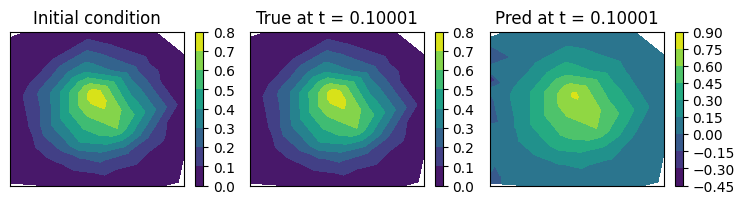

In [11]:
fig, axs = plt.subplots(figsize = (9,2), nrows = 1, ncols = 3, sharex = True, sharey = True)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
# fig.suptitle('t=0.1 | true at t= {} | pred at t={}'.format(final_t,final_t))
# Initial condition
axs0 = axs[0].tricontourf(Xfull[:,0],Xfull[:,1],fp_2d_u0(Xfull[:,0],Xfull[:,1]))
axs[0].title.set_text('Initial condition')
plt.colorbar(axs0, ax = axs[0])
# True next
axs1 = axs[1].tricontourf(Xfull[:,0],Xfull[:,1],fp_2d_sol(final_t, Xfull[:,0],Xfull[:,1]))
axs[1].title.set_text('True at t = {}'.format(final_t))
plt.colorbar(axs1, ax = axs[1])
# Predicted next
axs2 = axs[2].tricontourf(Xfull[:,0],Xfull[:,1],u_next)
axs[2].title.set_text('Pred at t = {}'.format(final_t))
plt.colorbar(axs2, ax = axs[2])
# Plot settings
for i in range(3):
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_yticks([])
    axs[i].set_xticks([])
#nmse = mean_squared_error(u_next,fp_1d_sol(final_t, Xfull))/mean_squared_error(0*fp_1d_sol(final_t, Xfull),fp_1d_sol(final_t, Xfull))
plt.show()

In [12]:
true = fp_2d_sol(final_t, Xfull[:,0],Xfull[:,1])
pred = u_next
rrmse = rel_mse(true, pred, root = True)
print('Relative MSE: {}'.format(rrmse))

Relative MSE: 0.32849115953324215


## Let's take small steps 

In [15]:
final_t = 0.5
masses = []
steps = int((final_t-0.1)//h)
#delta = Xfull[1]-Xfull[0]
# Initialize at the initial condition
uprev = u0
for _ in range(steps):
    y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
    #sol = jnp.linalg.solve(Kphiphi + nugget*R,y_prev)
    sol = jnp.linalg.solve(Kphiphi, y_prev)
    u_next = np.dot(Kphi.T,sol)
    #mass = trap(u_next,delta)
    #masses.append(mass)
    # update
    uprev = u_next[:Momega]

/home/juanfelipe/anaconda3/envs/jaxenv/lib/python3.11/site-packages/matplotlib/tri/_triangulation.py:179: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


ValueError: z array must not contain non-finite values within the triangulation

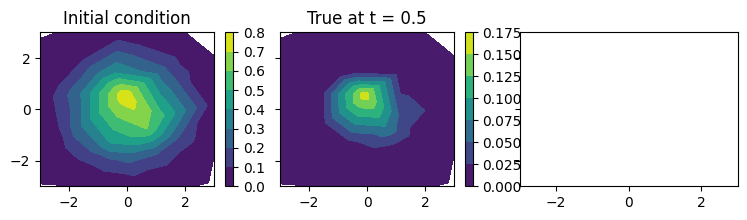

In [16]:
fig, axs = plt.subplots(figsize = (9,2), nrows = 1, ncols = 3, sharex = True, sharey = True)
fig.subplots_adjust(hspace=0.2, wspace=0.1)
# fig.suptitle('t=0.1 | true at t= {} | pred at t={}'.format(final_t,final_t))
# Initial condition
axs0 = axs[0].tricontourf(Xfull[:,0],Xfull[:,1],fp_2d_u0(Xfull[:,0],Xfull[:,1]))
axs[0].title.set_text('Initial condition')
plt.colorbar(axs0, ax = axs[0])
# True next
axs1 = axs[1].tricontourf(Xfull[:,0],Xfull[:,1],fp_2d_sol(final_t, Xfull[:,0],Xfull[:,1]))
axs[1].title.set_text('True at t = {}'.format(final_t))
plt.colorbar(axs1, ax = axs[1])
# Predicted next
axs2 = axs[2].tricontourf(Xfull[:,0],Xfull[:,1],u_next)
axs[2].title.set_text('Pred at t = {}'.format(final_t))
plt.colorbar(axs2, ax = axs[2])
# Plot settings
for i in range(3):
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_yticks([])
    axs[i].set_xticks([])
#nmse = mean_squared_error(u_next,fp_1d_sol(final_t, Xfull))/mean_squared_error(0*fp_1d_sol(final_t, Xfull),fp_1d_sol(final_t, Xfull))
plt.show()

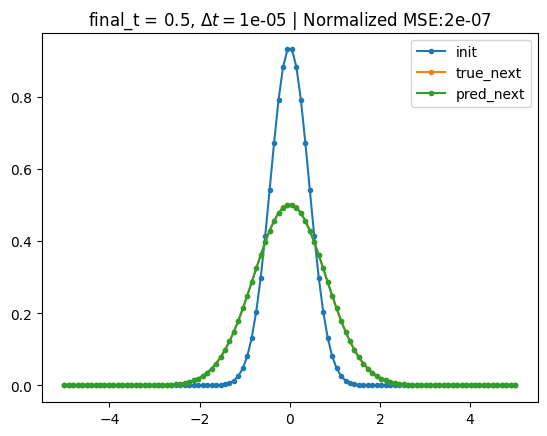

In [28]:
plt.figure()
# Initial condition
plt.plot(Xfull,fp_1d_u0(Xfull),'.-',label='init')
# True next
plt.plot(Xfull,fp_1d_sol(final_t, Xfull),'.-',label='true_next')
# Predicted next
plt.plot(Xfull,u_next,'.-',label='pred_next')
# Plot settings
nmse = mean_squared_error(u_next,fp_1d_sol(final_t, Xfull))/mean_squared_error(0*fp_1d_sol(final_t, Xfull),fp_1d_sol(final_t, Xfull))
plt.title('final_t = {}, $\Delta t = ${} | Normalized MSE:{}'.format(final_t, h, round(nmse,7)))
plt.legend()
plt.show()

### Mass conservation

In [29]:
masses[-1]

0.9997768307719392

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


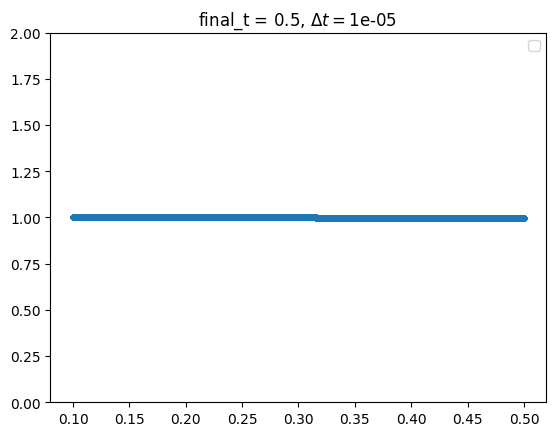

In [30]:
t_s = np.arange(0.1, final_t, h)[1:]
plt.figure()
# masses per time
plt.plot(t_s,masses,'.-',)
plt.ylim([0,2])
plt.title('final_t = {}, $\Delta t = ${} '.format(final_t, h))
plt.legend()
plt.show()

## Convergence

In [31]:
nugget = 0.

### Experiment 1

- $h = $`1e-1`
- `final_t`$ = 2$
- Collocation points increasing from $2^2$ to $2^{10}$

In [32]:
# Experiment 1.1 - L2-norms
L2_norms_1 = []
xrange = 2**np.arange(2,10)
for n in range(2,10):
    # X_full
    Xfull = np.linspace(-5,5,2**n+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 1e-1
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_1.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.4840127840209582
0.5318349805566507
0.5320244274410558
0.5320160406978383
0.5176432699859396
0.3334997206817163
0.11867602063965019
0.03251147630273806


- $h = $`1e-2`
- `final_t`$ = 2$
- Collocation points increasing from $2^2$ to $2^{10}$

In [33]:
# Experiment 1.2 - L2-norms
L2_norms_2 = []
xrange = 2**np.arange(2,10)
for n in range(2,10):
    # X_full
    Xfull = np.linspace(-5,5,2**n+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 1e-2
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_2.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.48401278388909624
0.5318349193337487
0.5306384376800619
0.41979235028054057
0.1719955123032026
0.04967976353132331
0.012864420344297474
0.003190457160288305


- $h = $`1e-3`
- `final_t`$ = 0.2$
- Collocation points increasing from $2^2$ to $2^{10}$

In [34]:
# Experiment 1.3 - L2-norms
L2_norms_3 = []
xrange = 2**np.arange(2,10)
for n in range(2,10):
    # X_full
    Xfull = np.linspace(-5,5,2**n+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 1e-3
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_3.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.4840127048978171
0.5318067472264195
0.48316456797364554
0.15144756817652277
0.027028527431421593
0.00563321771534434
0.0013259604279984103
0.00032078909160952165


- $h = $`1e-4`
- `final_t`$ = 0.2$
- Collocation points increasing from $2^2$ to $2^{10}$

In [35]:
# Experiment 1.4 - L2-norms
L2_norms_4 = []
xrange = 2**np.arange(2,10)
for n in range(2,10):
    # X_full
    Xfull = np.linspace(-5,5,2**n+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 1e-4
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_4.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.4840126194666929
0.531779759472247
0.46171308190476595
0.10195696382701298
0.009697141536637484
0.001029591999043271
0.00016241219430579868
3.3984941764191274e-05


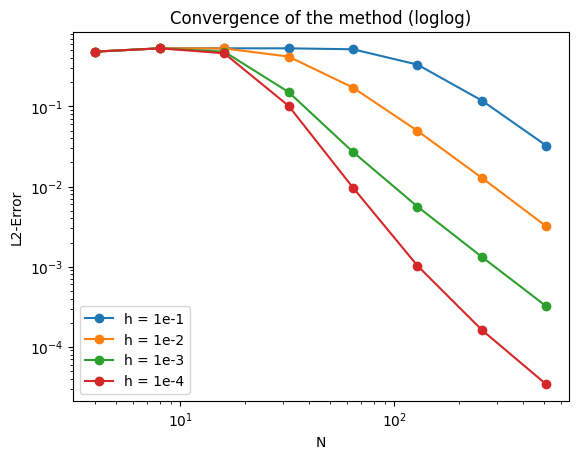

In [36]:
# One plot
plt.loglog(xrange,L2_norms_1,label = 'h = 1e-1', marker = 'o')
plt.loglog(xrange,L2_norms_2,label = 'h = 1e-2', marker = 'o')
plt.loglog(xrange,L2_norms_3,label = 'h = 1e-3', marker = 'o')
plt.loglog(xrange,L2_norms_4,label = 'h = 1e-4', marker = 'o')
plt.xlabel('N')
plt.ylabel('L2-Error')
plt.legend()
plt.title('Convergence of the method (loglog)')
plt.show()

### Experiment 2

- $h$ decreasing from `1e-2` to `1e-5`
- `final_t`$ = 0.5$
- Collocation points = $2^5$

In [37]:
# Experiment 2.1 - L2-norms
L2_norms_1 = []
xrange = 10.0**(-np.arange(2,6))
for n in range(2,6):
    # X_full
    Xfull = np.linspace(-5,5,2**5+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 10**(-n)
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_1.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.41979235028054057
0.15144756817652277
0.10195696382701298
0.09666776579980127


- $h$ decreasing from `1e-2` to `1e-5`
- `final_t`$= 0.5$
- Collocation points = $2^6$

In [38]:
# Experiment 2.2 - L2-norms
L2_norms_2 = []
xrange = 10.0**(-np.arange(2,6))
for n in range(2,6):
    # X_full
    Xfull = np.linspace(-5,5,2**6+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 10**(-n)
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_2.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.1719955123032026


0.027028527431421593
0.009697141536637484
0.00793224479591271


- $h$ decreasing from `1e-2` to `1e-5`
- `final_t`$= 0.5$
- Collocation points = $2^7$

In [39]:
# Experiment 2.3 - L2-norms
L2_norms_3 = []
xrange = 10.0**(-np.arange(2,6))
for n in range(2,6):
    # X_full
    Xfull = np.linspace(-5,5,2**7+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 10**(-n)
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_3.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.04967976353132331
0.00563321771534434
0.001029591999043271
0.0005672058987458489


- $h$ decreasing from `1e-2` to `1e-5`
- `final_t`$= 0.5$
- Collocation points = $2^8$

In [40]:
# Experiment 2.4 - L2-norms
L2_norms_4 = []
xrange = 10.0**(-np.arange(2,6))
for n in range(2,6):
    # X_full
    Xfull = np.linspace(-5,5,2**8+2)
    # Delta
    delta = Xfull[1]-Xfull[0]
    # X_{\partial\Omega}
    Xboundary = Xfull[[0,-1]]
    # X_\Omega
    Xomega = Xfull[1:-1]
    # u(X_\Omega,0)
    u0 = fp_1d_u0(Xomega)
    # Kernel lenght-scale
    k_param = 0.5
    # Time step
    h = 10**(-n)
    # Final t
    final_t = 2.5
    # No. of steps
    steps = int((final_t-0.1)//h)
    # Compute Kphiphi
    Kphiphi = Kphiphi_assembly(Xomega, Xboundary, h, k = kernel, k_param = k_param)
    # Regularizer for Kphiphi
    R = jnp.diag(jnp.diag(Kphiphi))
    # Compute Kphi againts Xfull which will be the test set
    Kphi = Kphi_assembly(Xfull, Xomega, Xboundary, h, k = kernel, k_param = k_param)
    
    uprev = u0
    for _ in range(steps):
        y_prev = jnp.concatenate((uprev,np.zeros((len(Xboundary)),)))
        sol = jnp.linalg.solve(Kphiphi + nugget*R, y_prev)
        u_next = np.dot(Kphi.T,sol)
        # update
        uprev = u_next[1:-1]
    
    # Numerical
    u_next = np.dot(Kphi.T,sol)
    # Analytical
    u_true = fp_1d_sol(final_t, Xfull)   
    # Differences
    f = np.abs(u_next - u_true)**2
    # Append L2 norm per iteration
    L2_norms_4.append(trap(f,delta))
    # Print L2 norm per iteration
    print(trap(f,delta))

0.012864420344297474


0.0013259604279984103
0.00016241219430579868
4.5974306503454416e-05


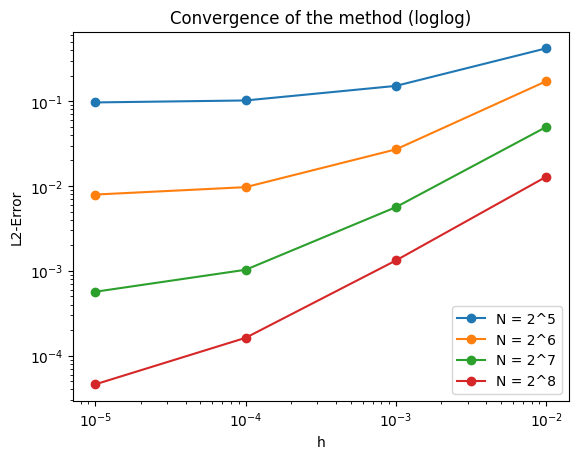

In [41]:
# One plot
plt.loglog(xrange,L2_norms_1,label = 'N = 2^5', marker = 'o')
plt.loglog(xrange,L2_norms_2,label = 'N = 2^6', marker = 'o')
plt.loglog(xrange,L2_norms_3,label = 'N = 2^7', marker = 'o')
plt.loglog(xrange,L2_norms_4,label = 'N = 2^8', marker = 'o')
plt.xlabel('h')
plt.ylabel('L2-Error')
plt.legend()
plt.title('Convergence of the method (loglog)')
plt.show()